# Project 11-2: Use categorical variables with the diamonds data

The data for this project is on the Seaborn website, named "diamonds"
Information about the diamonds data set from Seaborn
Diamonds

price: dolar (326 - 18623)

carat: (0.2 - 5.01)

cut: (Fair, Good, Very Good, Premium, Ideal)

color: (from J(worst) to D(best))

clarity: (I1(worst), SI2, SI1, VS2, VS1, VVS1, IF(best))

x: length in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: Percentage of Total Depth = z / mean(x,y) = 2 * z / (x + y) (43-79)

table: The width of the diamond at its widest point (43-95)

In [1]:
# Import needed modules

# Import pandas and create the alias pd
import pandas as pd

# Import seaborn and create the alias sns
import seaborn as sns

# import the required sklearn modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [2]:
# Task 01
# Read the data from the Seaborn website, "diamonds"

data = sns.load_dataset('diamonds')

In [3]:
# Task 02, display the first five rows

data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Task 03, drop the x, y and z collumns.

data.drop(columns = ['x', 'y', 'z'], inplace = True)


In [5]:
# Task 04, run info() to display the data types

data.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [6]:
# Task 05, convert the three columns of categorical data into dummy varialbles
#            and store the results in a new DataFrame

catColumns = ['cut', 'color', 'clarity']

dummies = pd.get_dummies(data[catColumns])


In [7]:
# Task 06, drop the categorical columns from the original DataFrame and 
#            join the DataFrame with the dummy variables to it and 
#            store the in a DataFrame named dataDummies, then use info() to 
#            display the resulting columns.

dataDummies = data.drop(columns = catColumns)
dataDummies = dataDummies.join(dummies)
dataDummies.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  uint8  
 5   cut_Premium    53940 non-null  uint8  
 6   cut_Very Good  53940 non-null  uint8  
 7   cut_Good       53940 non-null  uint8  
 8   cut_Fair       53940 non-null  uint8  
 9   color_D        53940 non-null  uint8  
 10  color_E        53940 non-null  uint8  
 11  color_F        53940 non-null  uint8  
 12  color_G        53940 non-null  uint8  
 13  color_H        53940 non-null  uint8  
 14  color_I        53940 non-null  uint8  
 15  color_J        53940 non-null  uint8  
 16  clarity_IF     53940 non-null  uint8  
 17  clarity_VVS1   53940 non-null  uint8  
 18  clarit

In [8]:
# Task 07, rescale the data in the numeric columns and then display the rescaled data.

numCols = ['carat', 'depth', 'table']

scaler = StandardScaler()

dataDummies[numCols] = scaler.fit_transform(dataDummies[numCols])

dataDummies


,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.240361,-1.360738,1.585529,326,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.198168,-3.385019,3.375663,327,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.071587,0.454133,0.242928,334,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,-1.029394,1.082358,0.242928,335,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,2757,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53936,-0.164427,0.942753,-1.099672,2757,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,-0.206621,0.733344,1.137995,2757,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53938,0.130927,-0.523105,0.242928,2757,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Task 08, display the correlation data for the price column

dataDummies.corr()[['price']].sort_values(by = 'price', ascending = False)


,price
price,1.000000
carat,0.921591
clarity_SI2,0.128420
table,0.127134
color_I,0.097125
cut_Premium,0.095706
color_J,0.081710
color_H,0.059223
cut_Fair,0.018728
clarity_SI1,0.008957


In [10]:
# Task 09, create the test and training dataset using the 5 columns with the highest correlation
#            The test dataset will consist of 30% of the dataset and specify a value for the 
#            random_state parameter.

x_train, x_test = train_test_split(dataDummies, test_size = 0.30, random_state = 42)


In [11]:
# Task 10, create and fit the model

model = LinearRegression()
xCols = ['carat', 'clarity_SI2', 'table', 'color_I', 'cut_Premium']
model.fit(x_train[xCols], x_train['price'])



LinearRegression()

In [12]:
# Task 11, Score the model with the test dataset

model.score(x_test[xCols], x_test['price'])


0.8693102670849093

In [13]:
# Task 12, Score the model with the training dataset

model.score(x_train[xCols], x_train['price'])


0.8688884419641665

In [14]:
# Task 13, use the model to make predictions about the test data
#            and store the results in a DataFrame.

y_predicted = model.predict(x_test[xCols])

predicted = pd.DataFrame(y_predicted, columns = ['predicted_Price'])

# predicted.head()


In [15]:
# Task 14, create a new DataFrame for the columns used to create the predicition,
#            the actual price and the predicted price. Then show the first 5 rows.

final = predicted.join([x_test[xCols].reset_index(drop = True),
                       x_test['price'].reset_index(drop = True)])

final.head()


,predicted_Price,carat,clarity_SI2,table,color_I,cut_Premium,price
0,-229.229099,-1.177071,0,-0.652139,0,0,559
1,2482.289799,-0.459782,0,-0.204605,0,0,2201
2,1149.698023,-0.839523,0,-1.099672,0,0,1238
3,1296.093454,-0.776233,0,-0.204605,0,1,1304
4,9205.279246,1.586602,1,-1.099672,0,0,6901


In [16]:
# Task 15, calculate the residual for the regression and store the results in a new column
#            in the DataFrame created in Task 14. Then show the first 5 rows.


final['residual'] = final.price - final.predicted_Price

final.head()


,predicted_Price,carat,clarity_SI2,table,color_I,cut_Premium,price,residual
0,-229.229099,-1.177071,0,-0.652139,0,0,559,788.229099
1,2482.289799,-0.459782,0,-0.204605,0,0,2201,-281.289799
2,1149.698023,-0.839523,0,-1.099672,0,0,1238,88.301977
3,1296.093454,-0.776233,0,-0.204605,0,1,1304,7.906546
4,9205.279246,1.586602,1,-1.099672,0,0,6901,-2304.279246


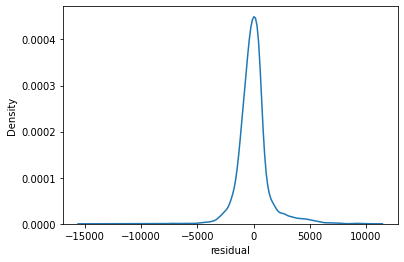

In [17]:
# Task 16, plot the residual in a Seaborn KDE plot.

sns.kdeplot(data = final, x = 'residual');

In [19]:
# Task 17, use a for loop, with the feature selection, to test a varing number
#            of features. Do not include the price column. This may take some time
#            to run.

model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(x_train.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(x_train.drop(columns=['price']), x_train['price'])

    x_train_fs = fs.transform(x_train.drop(columns=['price']))
    x_test_fs = fs.transform(x_test.drop(columns=['price']))

    model.fit(x_train_fs, x_train['price'])
    
    testScore = model.score(x_test_fs, x_test['price'])
    trainScore = model.score(x_train_fs, x_train['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    


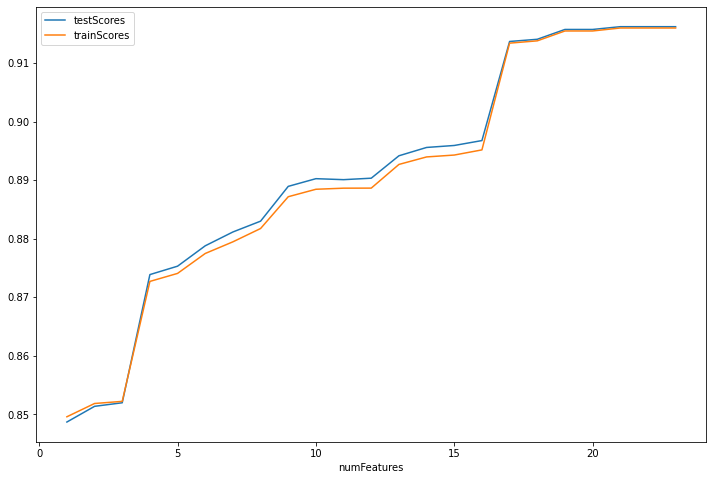

In [20]:
# Task 18, plot the test and training scores in a line plot, based on the number of features.

df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores'], figsize = (12,8));